In [74]:
import pandas as pd

Load LEGO sets data

In [75]:
LEGO_sets_df = pd.read_csv('sets.csv')

### Original data set description

#### Context

LEGO is the largest toy manufacturer on the planet, and there is a growing market for LEGO set investments. Some studies have even shown that you can beat the S&P 500. For example, a single Boba Fett minifigure is now valued at over $3,000. With the goal of looking at this trend, this data has the most up to date list of sets and features along with list and resale prices.

#### Content

This dataset uses a combination of data from two API's from Brickset.com and Bricklink.com. The features include name, year, theme, theme group, subtheme, category, packaging type, number of instructions, retail availability, number of pieces, number of minifigures, user reviews (out of 5 stars), list price in USD, and latest resale price in USD.

List prices and features - Brickset API as of 05/10/2023

Resale Price - Bricklink API as of 05/10/2023

In [76]:
LEGO_sets_df.head()

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,75-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},16.0,NaN,10.0,0.0,NaN,NaN,NaN
1,77-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},20.0,NaN,11.0,0.0,NaN,NaN,NaN
2,077-1,Pre-School Set,1975,Duplo,Pre-school,NaN,Normal,{Not specified},0,{Not specified},21.0,NaN,10.0,0.0,NaN,0.0,NaN
3,78-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},32.0,NaN,8.0,0.0,NaN,NaN,NaN
4,78-3,Basic Set,1975,Samsonite,Vintage,Basic set,Normal,Box,0,{Not specified},330.0,NaN,10.0,0.0,NaN,0.0,NaN


In [77]:
LEGO_sets_df['Theme_Group'].value_counts()

Miscellaneous       3407
Modern day          2228
Licensed            2068
Pre-school          1547
Action/Adventure    1177
Basic                827
Model making         725
Technical            594
Constraction         491
Historical           468
Educational          435
Racing               270
Girls                240
Junior               228
Vintage              114
Art and crafts        96
Name: Theme_Group, dtype: int64

In [78]:
LEGO_sets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14936 entries, 0 to 14935
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Set_ID            14936 non-null  object 
 1   Name              14936 non-null  object 
 2   Year              14936 non-null  int64  
 3   Theme             14936 non-null  object 
 4   Theme_Group       14915 non-null  object 
 5   Subtheme          11495 non-null  object 
 6   Category          14936 non-null  object 
 7   Packaging         14936 non-null  object 
 8   Num_Instructions  14936 non-null  int64  
 9   Availability      14936 non-null  object 
 10  Pieces            13133 non-null  float64
 11  Minifigures       7686 non-null   float64
 12  Owned             14771 non-null  float64
 13  Rating            14936 non-null  float64
 14  USD_MSRP          5837 non-null   float64
 15  Total_Quantity    12276 non-null  float64
 16  Current_Price     5442 non-null   float6

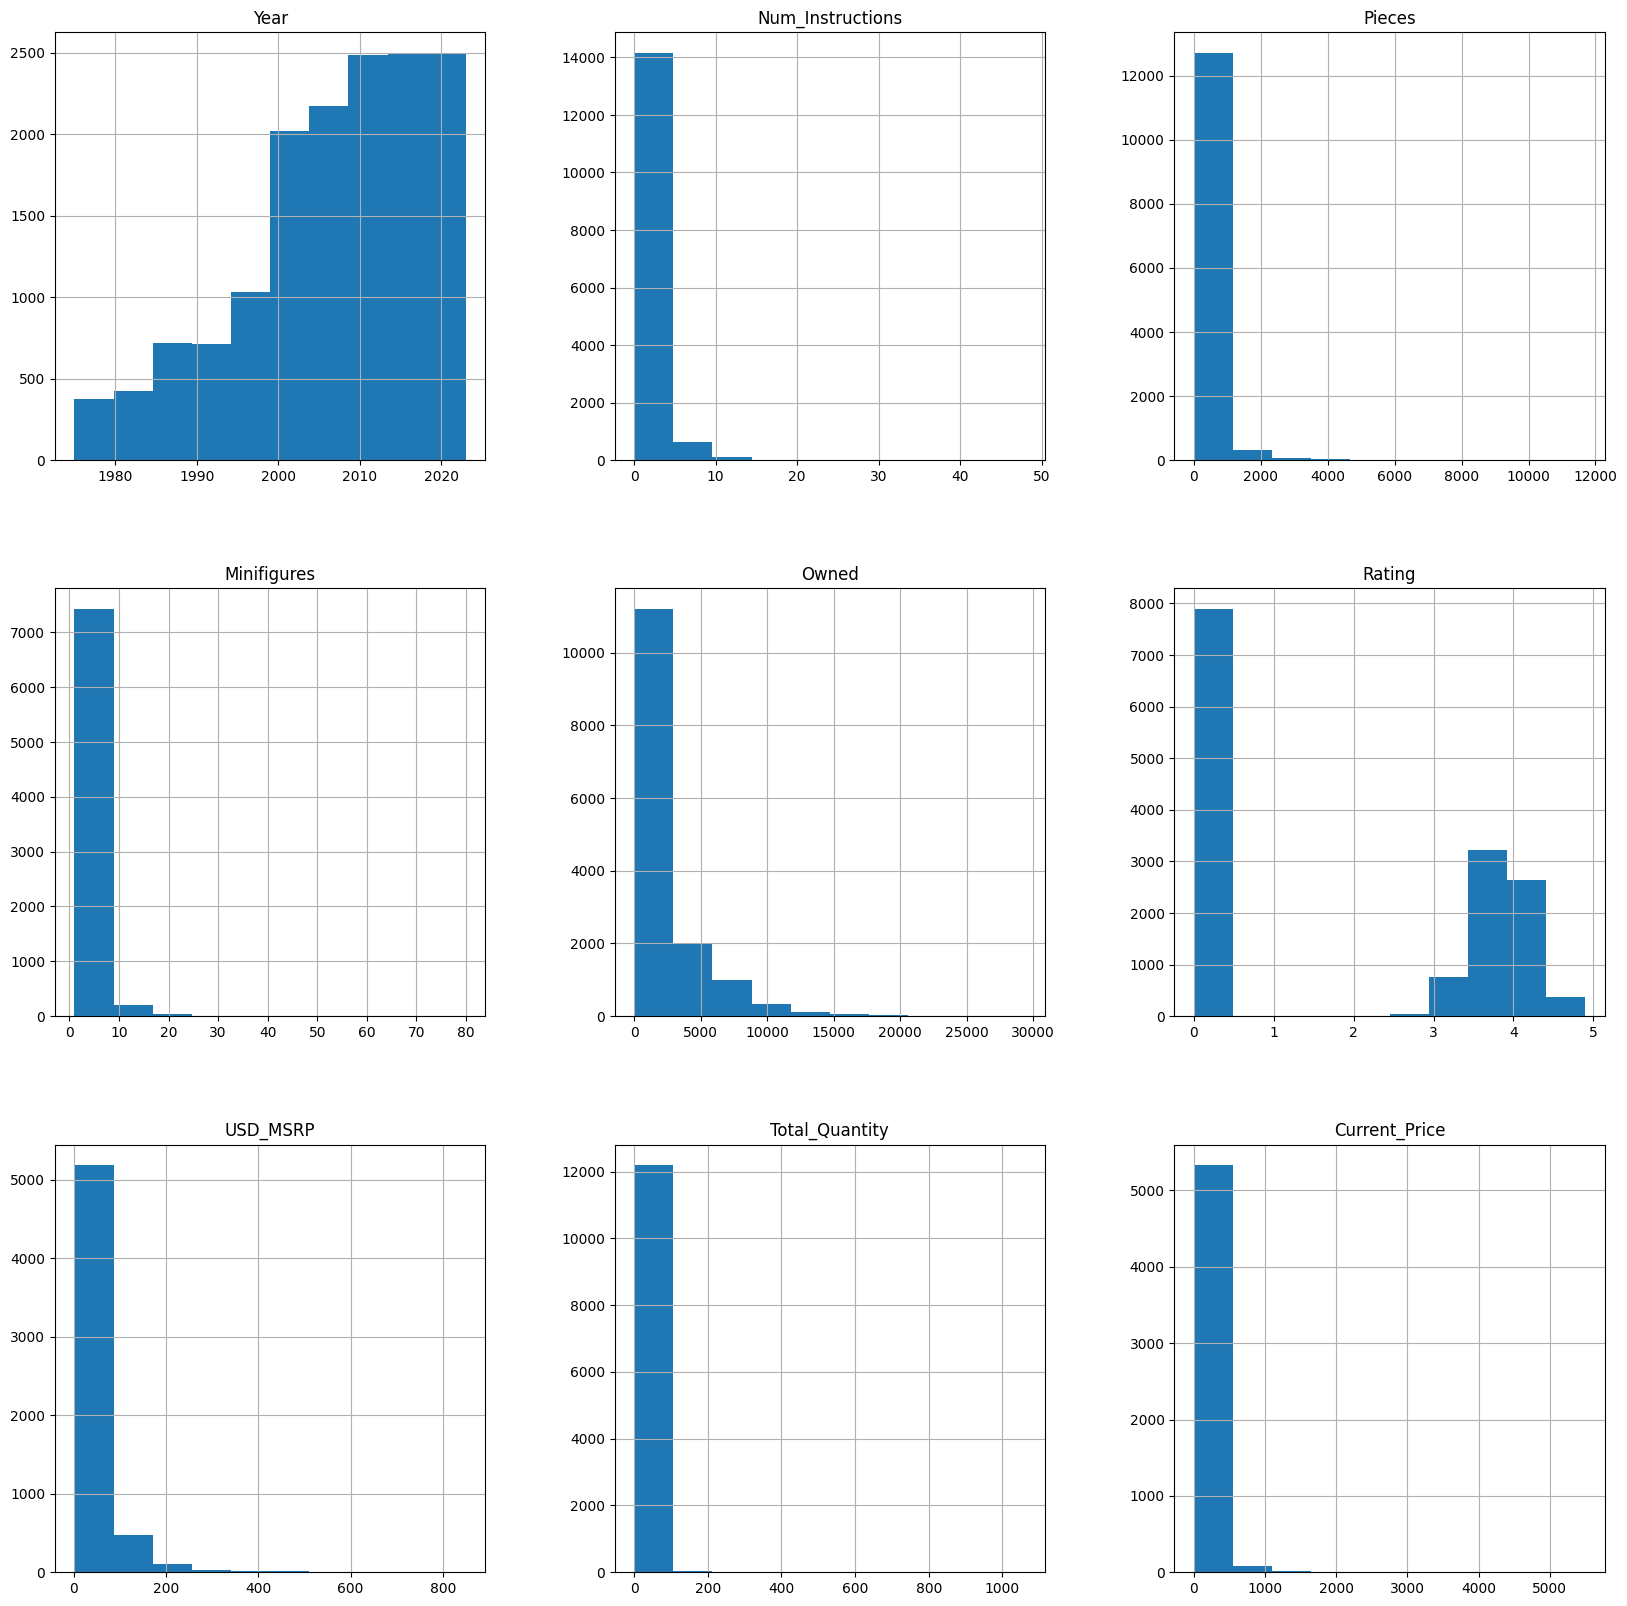

In [79]:
# make histogram of numeric columns only

import matplotlib.pyplot as plt
LEGO_sets_df.hist(figsize=(20,20))
plt.show()

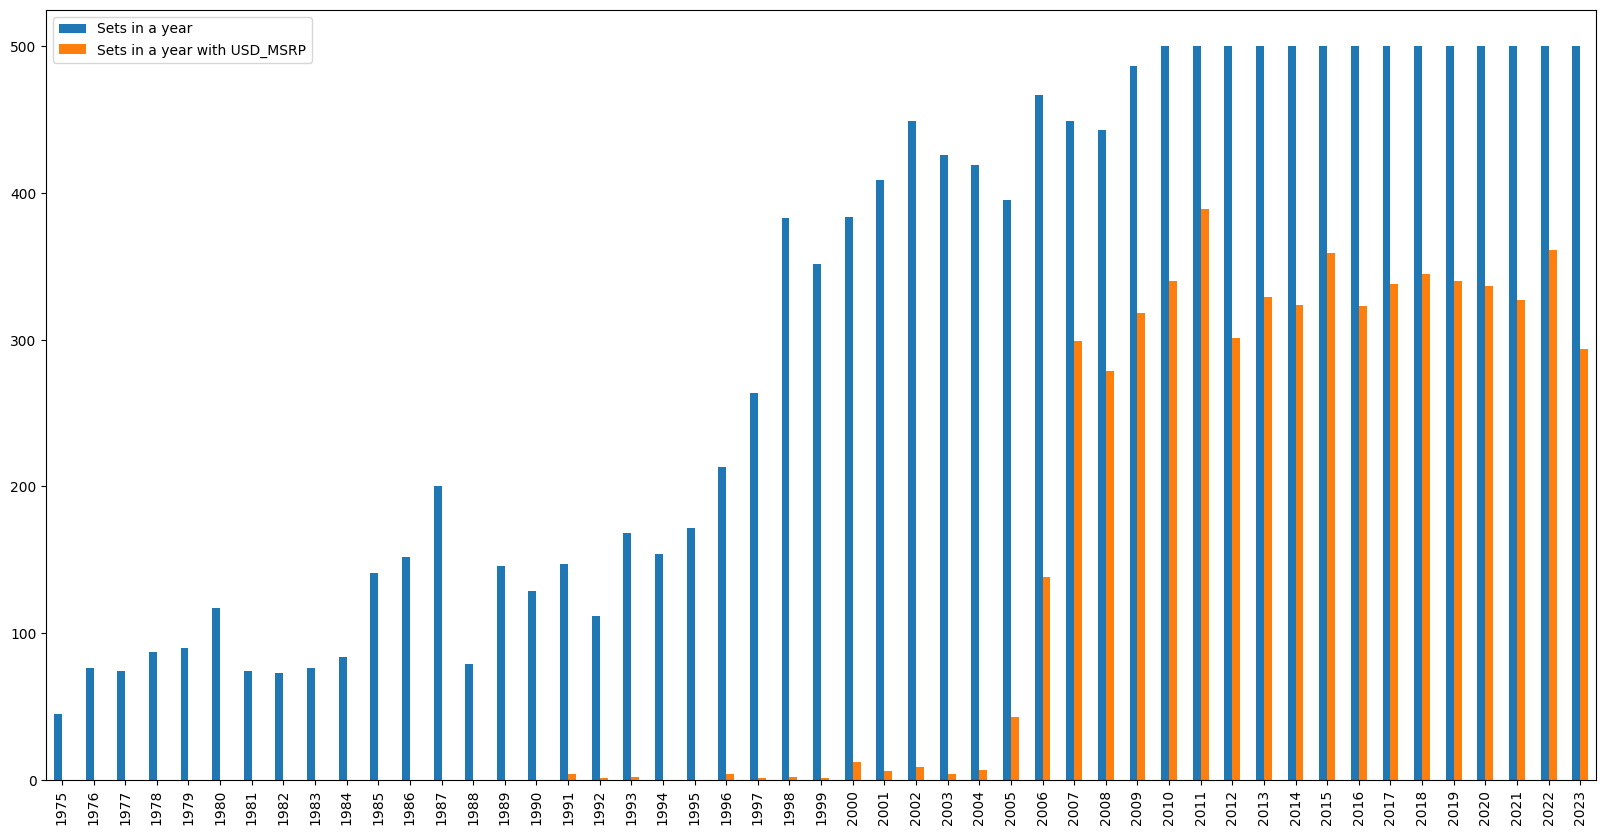

In [80]:
import matplotlib.pyplot as plt

# Calculate value counts
all_years = LEGO_sets_df['Year'].value_counts().sort_index()
non_null_years = LEGO_sets_df[LEGO_sets_df['USD_MSRP'].notnull()]['Year'].value_counts().sort_index()

# Create a DataFrame from the value counts
df = pd.DataFrame({'Sets in a year': all_years, 'Sets in a year with USD_MSRP': non_null_years})

# Create the bar plot
df.plot(kind='bar', figsize=(20,10))

plt.show()

look at price box plot grouped by year after the year 1989

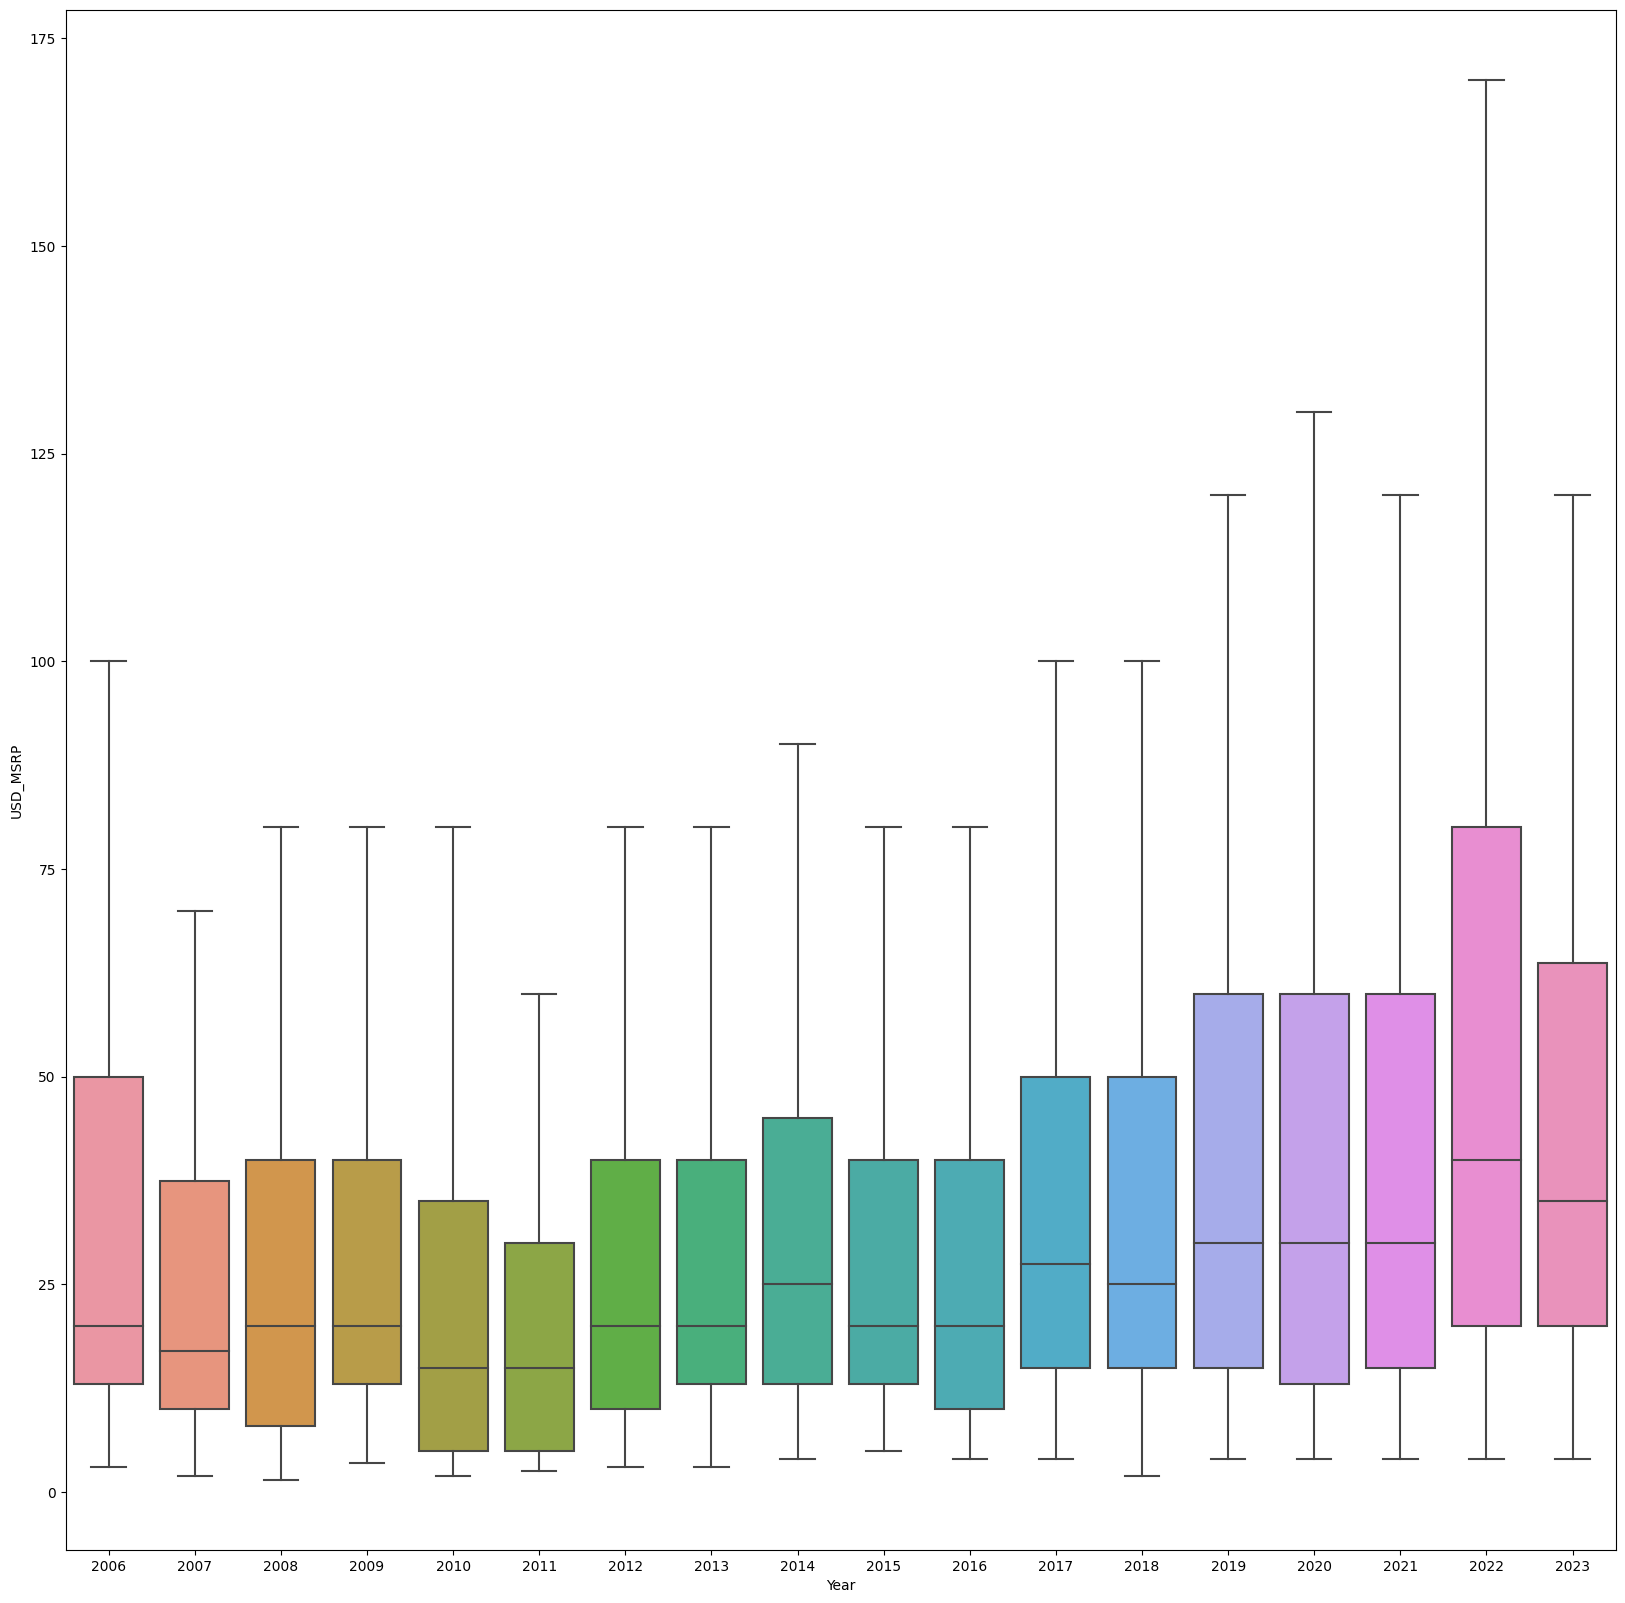

In [81]:
import seaborn as sns

# Filter the DataFrame
filtered_df = LEGO_sets_df[LEGO_sets_df['Year'] > 2005]

# Make box plot of price grouped by year without outliers
plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='USD_MSRP', data=filtered_df, showfliers=False)
plt.show()

<Axes: xlabel='Name'>

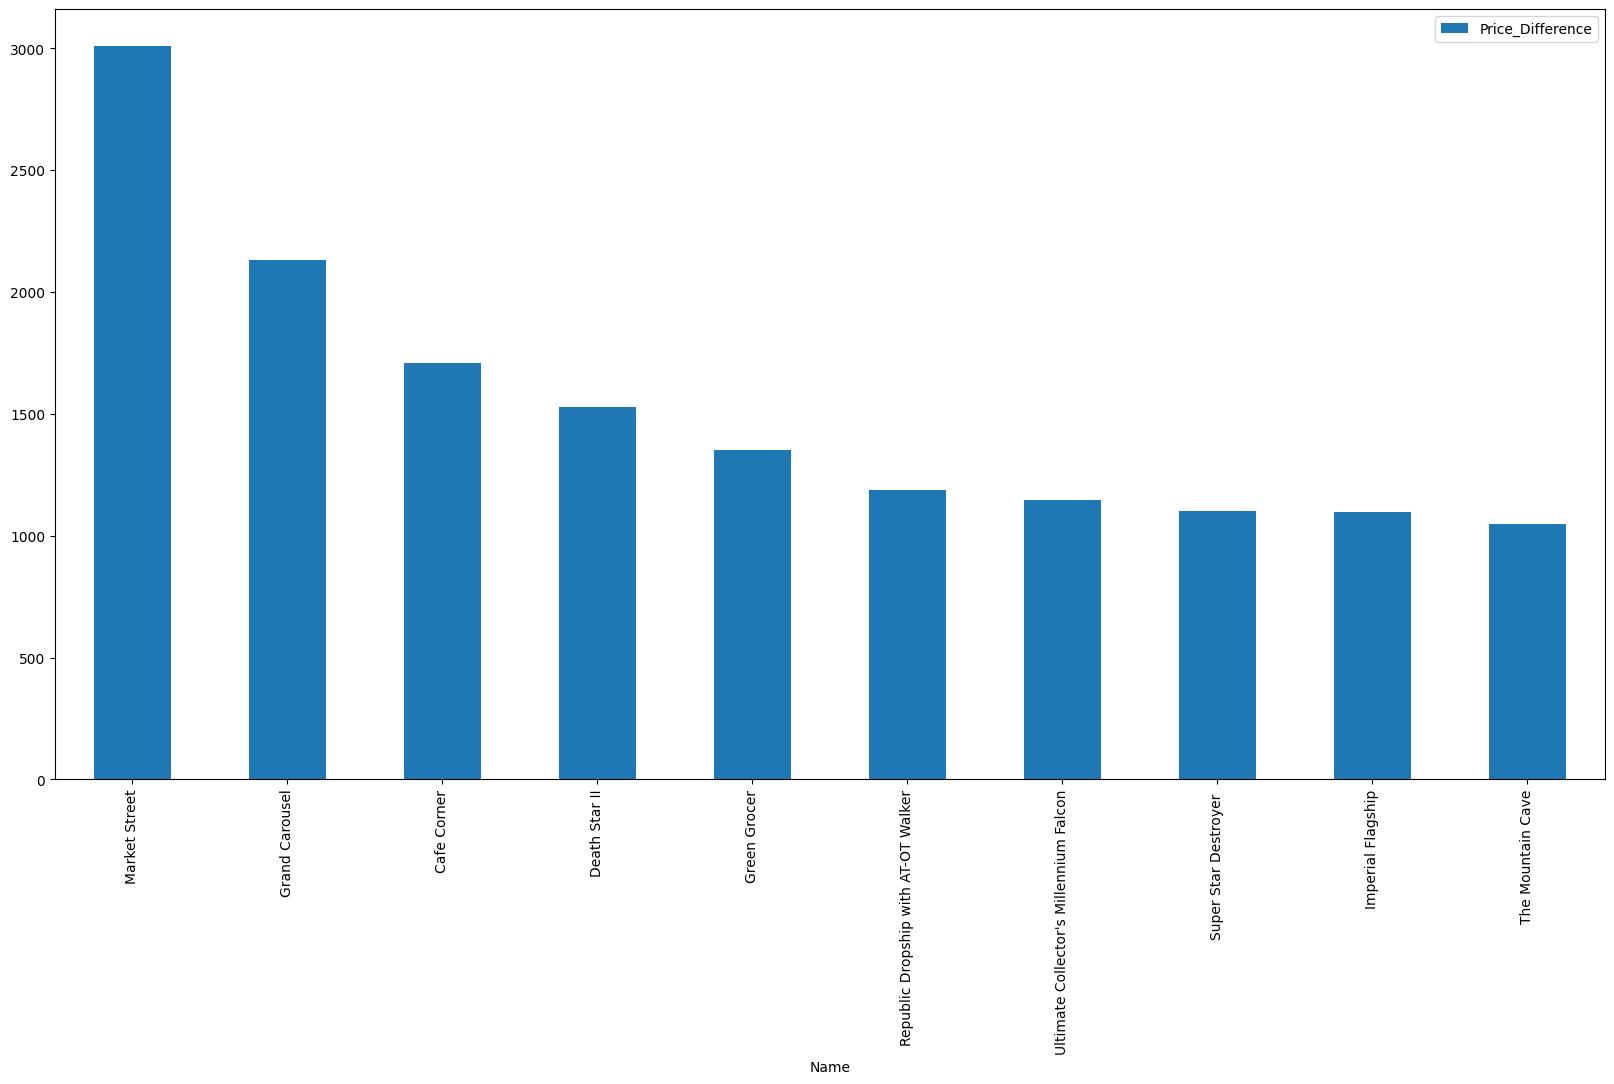

In [82]:
# show the 10 biggest differences between Current_Price and USD_MSRP

LEGO_sets_df['Price_Difference'] = LEGO_sets_df['Current_Price'] - LEGO_sets_df['USD_MSRP']
LEGO_sets_df.sort_values(by='Price_Difference', ascending=False).head(10).plot(x='Name', y='Price_Difference', kind='bar', figsize=(20,10))

<Axes: xlabel='Name'>

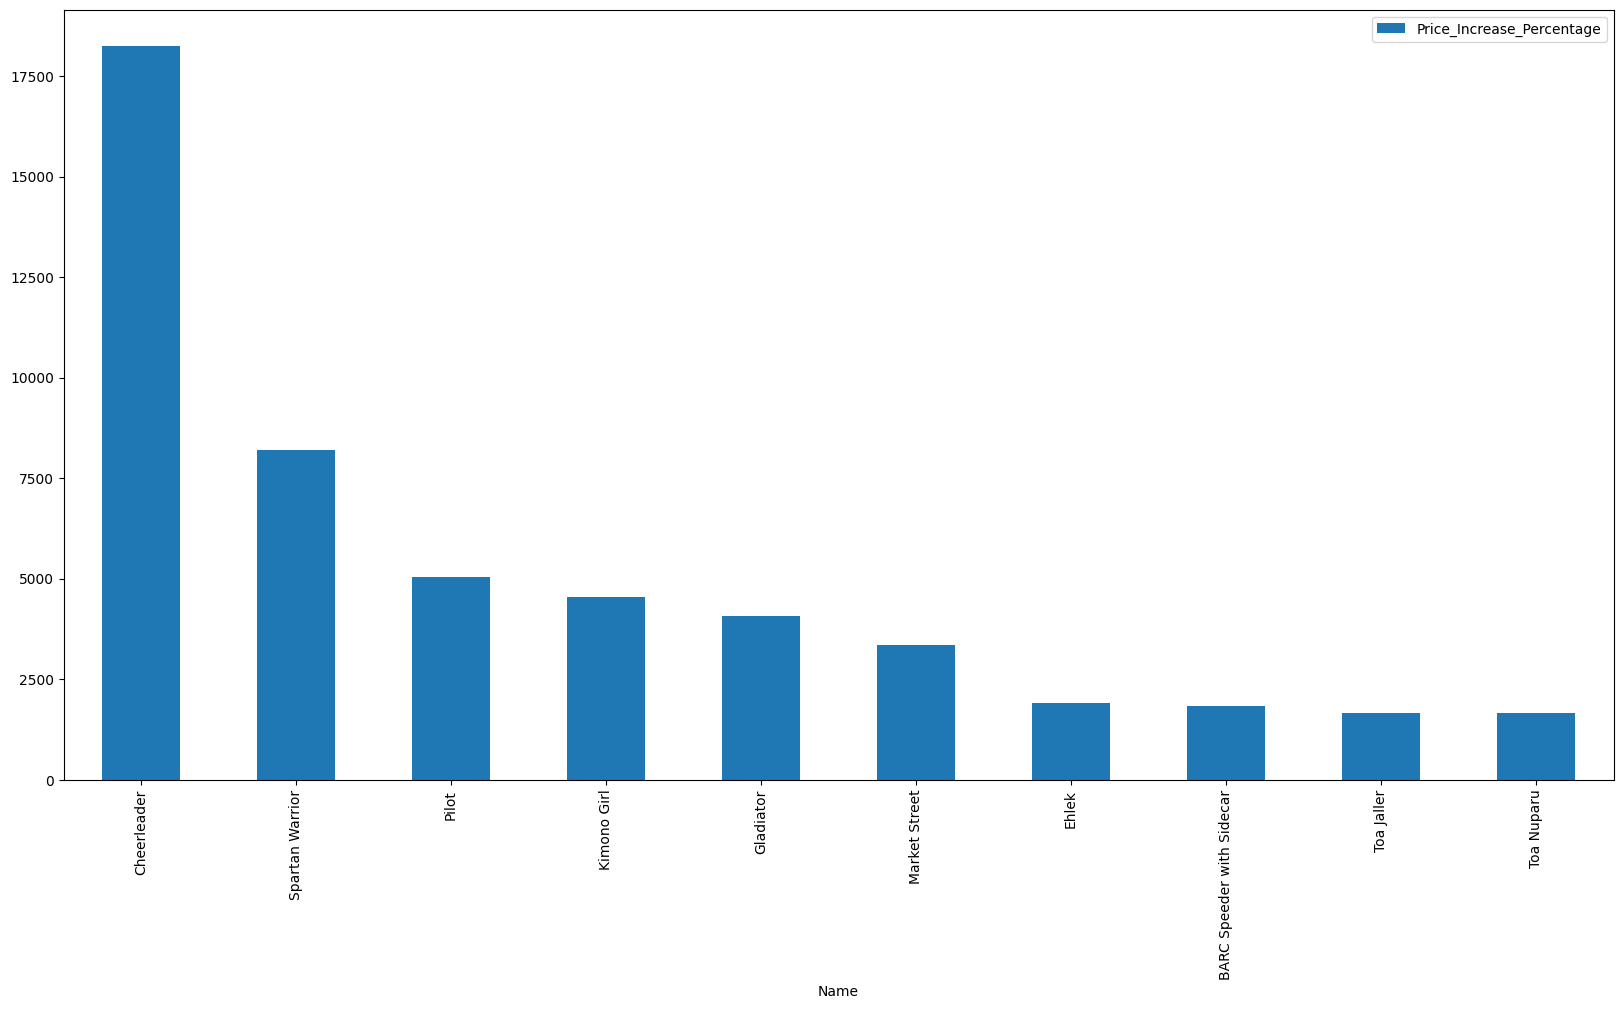

In [83]:
# Add a new column for the price increase percentage
LEGO_sets_df['Price_Increase_Percentage'] = (LEGO_sets_df['Price_Difference'] / LEGO_sets_df['USD_MSRP']) * 100

# Show the 10 biggest differences between Current_Price and USD_MSRP
LEGO_sets_df.sort_values(by='Price_Increase_Percentage', ascending=False).head(10).plot(x='Name', y='Price_Increase_Percentage', kind='bar', figsize=(20,10))

Deflation of the USD_MSRP

Or adjust for inflation

We will do it based on 2023 dollars

In [84]:
# read inflation_rates.csv

inflation_rates_df = pd.read_csv('inflation_rates.csv')

# change the Inflation Rate YOY4 column from string to float

inflation_rates_df['Inflation Rate YOY4'] = inflation_rates_df['Inflation Rate YOY4'].str.replace('%', '').astype(float)

inflation_rates_df['Inflation Rate YOY4'] = 1+inflation_rates_df['Inflation Rate YOY4']/100

inflation_rates_df['Year'] = inflation_rates_df['Year']-1

# add year 2023 with inflation rate 1
inflation_rates_df = pd.concat([inflation_rates_df, pd.DataFrame({'Year': [2023], 'Inflation Rate YOY4': [1]})], axis=0)

# Reset the index
inflation_rates_df.reset_index(drop=True, inplace=True)

inflation_rates_df

,Year,Inflation Rate YOY4
0,1974,1.069
1,1975,1.049
2,1976,1.067
3,1977,1.090
4,1978,1.133
5,1979,1.125
6,1980,1.089
7,1981,1.038
8,1982,1.038
9,1983,1.039


In [92]:
# add a column to inflation_rates_df with name 'Adjusted_to_2023'

inflation_rates_df['Adjusted_to_2023'] = 1

# from the Year 2022 untill 1974, multiply the Inflation Rate YOY4 column by the Adjusted_to_2023 column one row below and save it in the Adjusted_to_2023 column

for i in range(2022, 1974, -1):
    print(inflation_rates_df.loc[inflation_rates_df['Year'] == i, 'Adjusted_to_2023'])
    inflation_rates_df.loc[inflation_rates_df['Year'] == i, 'Adjusted_to_2023'] = inflation_rates_df['Adjusted_to_2023'].shift(1) * inflation_rates_df['Inflation Rate YOY4']

#inflation_rates_df

48    1
Name: Adjusted_to_2023, dtype: int64
47    1.0
Name: Adjusted_to_2023, dtype: float64
46    1.0
Name: Adjusted_to_2023, dtype: float64
45    1.0
Name: Adjusted_to_2023, dtype: float64
44    1.0
Name: Adjusted_to_2023, dtype: float64
43    1.0
Name: Adjusted_to_2023, dtype: float64
42    1.0
Name: Adjusted_to_2023, dtype: float64
41    1.0
Name: Adjusted_to_2023, dtype: float64
40    1.0
Name: Adjusted_to_2023, dtype: float64
39    1.0
Name: Adjusted_to_2023, dtype: float64
38    1.0
Name: Adjusted_to_2023, dtype: float64
37    1.0
Name: Adjusted_to_2023, dtype: float64
36    1.0
Name: Adjusted_to_2023, dtype: float64
35    1.0
Name: Adjusted_to_2023, dtype: float64
34    1.0
Name: Adjusted_to_2023, dtype: float64
33    1.0
Name: Adjusted_to_2023, dtype: float64
32    1.0
Name: Adjusted_to_2023, dtype: float64
31    1.0
Name: Adjusted_to_2023, dtype: float64
30    1.0
Name: Adjusted_to_2023, dtype: float64
29    1.0
Name: Adjusted_to_2023, dtype: float64
28    1.0
Name: Adjusted

In [86]:
# add a column with the deflated or inflation adjusted USD_MSRP
# it should be done based on the 2023 USD value

# Create a new column with the inflation-adjusted USD_MSRP
LEGO_sets_df['Inflation_Adjusted_USD_MSRP'] = LEGO_sets_df.apply(lambda row: row['USD_MSRP'] * inflation_rates[row['Year']], axis=1)

NameError: name 'inflation_rates' is not defined